# 1. Eigenfaces

## a,b) Load data

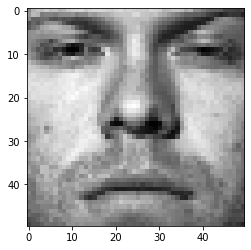

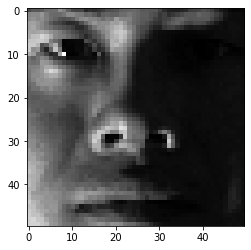

In [6]:
#####---Cornell ECE5414 Homework 2: Eigenface---######
import pandas as pd
import numpy as np
import math
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from scipy.linalg import svd
import imageio as imo
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

#1.b Load data sets
face_train_file = open("/Users/zweedaothaiduy/Dropbox/Document/Study/Cornell Modules/Applied Machine Learning ECE5414/homework-2/faces/train.txt")
face_test_file = open("/Users/zweedaothaiduy/Dropbox/Document/Study/Cornell Modules/Applied Machine Learning ECE5414/homework-2/faces/test.txt")

train_labels, train_data = [], []

for line in face_train_file:
    img_url = line.strip().split()[0]
    img_url = "/Users/zweedaothaiduy/Dropbox/Document/Study/Cornell Modules/Applied Machine Learning ECE5414/homework-2" + img_url[1:]
    im = imo.imread(img_url)
    train_data.append(im.reshape(2500,))
    train_labels.append(line.strip().split()[1])

plt.imshow(train_data[10].reshape(50,50), cmap= cm.Greys_r)
plt.show()

test_labels, test_data = [], []
for line in face_test_file:
    img_url = line.strip().split()[0]
    img_url = "/Users/zweedaothaiduy/Dropbox/Document/Study/Cornell Modules/Applied Machine Learning ECE5414/homework-2" + img_url[1:]
    im = imo.imread(img_url)
    test_data.append(im.reshape(2500,))
    test_labels.append(line.strip().split()[1])

plt.imshow(test_data[10].reshape(50,50), cmap= cm.Greys_r)
plt.show()

## c) Average face

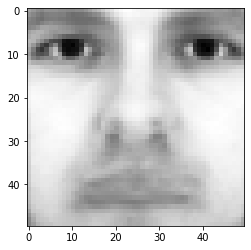

In [7]:
#1.c Average face
avg_face = np.array([])
val = 0

for col in range(0,train_data[0].size):
    for row in range(0,len(train_data)):
        val = val + train_data[row][col]
    val = val / len(train_data)
    avg_face = np.append(avg_face,val)

plt.imshow(avg_face.reshape(50,50), cmap= cm.Greys_r)
plt.show()

## 1.d Mean subtraction

In [8]:
#1.d Mean subtraction
train_data = train_data - avg_face
test_data = test_data - avg_face

## 1.e Eigenface

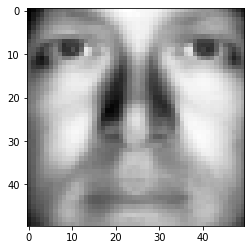

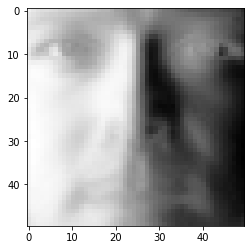

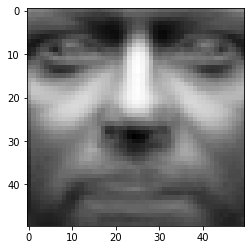

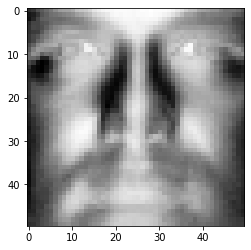

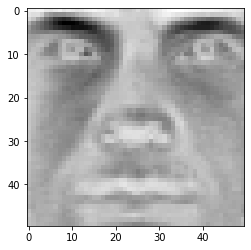

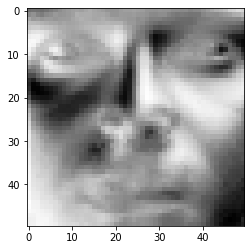

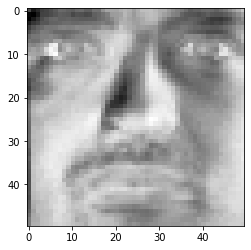

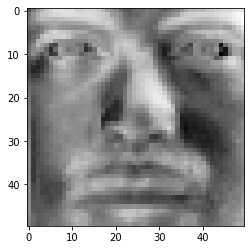

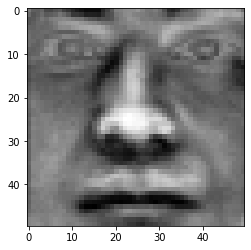

In [9]:
U, s, VT = svd(train_data)
Sigma = np.zeros((train_data.shape[0], train_data.shape[1]))
Sigma[:train_data.shape[0], :train_data.shape[0]] = np.diag(s)

for row in range(0,9):
    plt.imshow(VT[row].reshape(50,50), cmap= cm.Greys_r)
    plt.show()

## 1.f Low-rank approximation

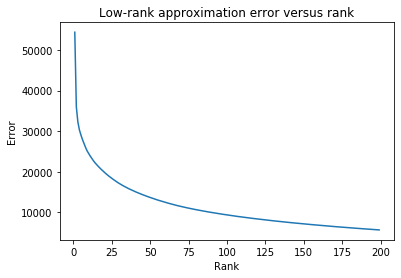

In [10]:
r_list, er_list = [], []    

for r in range (1,200):
    r_list.append(r)
    Xr = U[:,:r].dot(Sigma[:r,:r]).dot(VT[:r,:])
    er = np.linalg.norm(train_data - Xr)
    er_list.append(er)

plt.plot(r_list,er_list)
plt.title('Low-rank approximation error versus rank')
plt.xlabel('Rank')
plt.ylabel('Error')
plt.show()

## 1.g Eigenface Feature

In [4]:
def get_feature_matrix(data, VT, r):
    return data.dot(np.transpose(VT[:r,:]))

## 1.h Face recognition

In [14]:
F = get_feature_matrix(train_data,VT,10)
F_test = get_feature_matrix(test_data,VT,10)

logReg = LogisticRegression(multi_class='ovr')  
logReg.fit(F, train_labels)
logReg.score(F_test, test_labels)

r = 10
F = get_feature_matrix(train_data,VT,r)
F_test = get_feature_matrix(test_data,VT,r)
logReg.fit(F, train_labels)
print("Accuracy with r = 10:")
logReg.score(F_test, test_labels)

Accuracy with r = 10:


/Users/zweedaothaiduy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/zweedaothaiduy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.79

/Users/zweedaothaiduy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/zweedaothaiduy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/zweedaothaiduy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/zweedaothaiduy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/zweedaothaiduy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarn

/Users/zweedaothaiduy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/zweedaothaiduy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/zweedaothaiduy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/zweedaothaiduy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/zweedaothaiduy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarn

/Users/zweedaothaiduy/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/zweedaothaiduy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/zweedaothaiduy/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/zweedaothaiduy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/zweedaothaiduy/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Libline

/Users/zweedaothaiduy/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/zweedaothaiduy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/zweedaothaiduy/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/zweedaothaiduy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/zweedaothaiduy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

/Users/zweedaothaiduy/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/zweedaothaiduy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/zweedaothaiduy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/zweedaothaiduy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/zweedaothaiduy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarnin

/Users/zweedaothaiduy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/zweedaothaiduy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/zweedaothaiduy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/zweedaothaiduy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/zweedaothaiduy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarn

/Users/zweedaothaiduy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/zweedaothaiduy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/zweedaothaiduy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/zweedaothaiduy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/zweedaothaiduy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarn

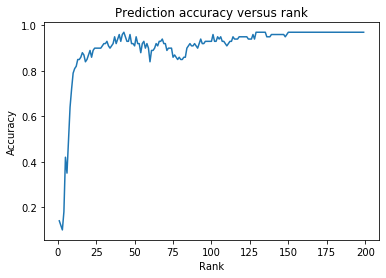

In [18]:
# generalize with r
logReg = LogisticRegression(multi_class='ovr')    
r_list, accuracies = [], []  

for r in range(1,200):
    r_list.append(r)
    F = get_feature_matrix(train_data,VT,r)
    F_test = get_feature_matrix(test_data,VT,r)
    
    logReg.fit(F, train_labels)
    accuracies.append(logReg.score(F_test, test_labels))

plt.plot(r_list,accuracies)
plt.title('Prediction accuracy versus rank')
plt.xlabel('Rank')
plt.ylabel('Accuracy')
plt.show()

# 2. What's cooking

## a & b) Load data

In [11]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import json
import re
import nltk
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from collections import OrderedDict


#2.b Load data sets
cooking_train_file = open("/Users/zweedaothaiduy/Dropbox/Document/Study/Cornell Modules/Applied Machine Learning ECE5414/homework-2/whats-cooking/train.json")
cooking_test_file = open("/Users/zweedaothaiduy/Dropbox/Document/Study/Cornell Modules/Applied Machine Learning ECE5414/homework-2/whats-cooking/test.json")

train_set = json.load(cooking_train_file)
test_set = json.load(cooking_test_file)
print("Number of recipes in training set:",len(train_set))
print("")

cuisines = []
ingredients = []

for recipe in train_set:
    cuisines.append(recipe['cuisine'])
    ingredients.extend(recipe['ingredients'])
    
cuisines = np.array(cuisines)
unique_cuisines, cuisine_counts = np.unique(cuisines, return_counts=True)
print("Number of types of cuisines:",len(unique_cuisines)) 
for cuisine in unique_cuisines:
    print(cuisine)
print("")
    
ingredients = np.array(ingredients)
ingredients, ingredient_counts = np.unique(ingredients, return_counts=True)
print("Number of unique ingredients:",len(ingredients)) 
for i in range(20):
    print(ingredients[i])
print("")

# cleaning Ingredients data
def clean_ingredient(ingredient):
    #Clean redundant words in a ingredient
    #make lower case
    ingredient = ingredient.lower()
    
    #remove whatever text in paranthesis
    regex = re.compile(r"\([^)]*\)")
    ingredient = regex.sub('',ingredient)
    
    #remove all numbers & funny signs
    regex = re.compile(r"\d+")
    ingredient = regex.sub('',ingredient)
    regex = re.compile(r"[\d+]")
    ingredient = regex.sub('',ingredient)
    regex = re.compile(r"%")
    ingredient = regex.sub('',ingredient)
    regex = re.compile(r"/")
    ingredient = regex.sub('',ingredient)
    
    #remove redundant info: less, reduced, etc.
    regex = re.compile(r"less [A-z]*")
    ingredient = regex.sub('',ingredient)
    regex = re.compile(r"reduced [A-z]*")
    ingredient = regex.sub('',ingredient)
    regex = re.compile(r"no [A-z]* added")
    ingredient = regex.sub('',ingredient)
    regex = re.compile(r"low [A-z]*")
    ingredient = regex.sub('',ingredient)
    regex = re.compile(r"[A-z]* free")
    ingredient = regex.sub('',ingredient)
    
    #remove any phrases after a comma, not important
    regex = re.compile(r", (.*)")
    ingredient = regex.sub('',ingredient)
    
    #strip spaces
    ingredient = ingredient.strip()
    
    #correct spelling
    words = ingredient.split()
    #words = [spell.correction(word) for word in words]
    
    #lemmatize words
    wnl = nltk.WordNetLemmatizer()
    lemmatized_words = [wnl.lemmatize(word) for word in words if word != '']
    ingredient = '_'.join(lemmatized_words)
    
    return ingredient

def clean_recipe(recipe):
    #Clean all ingredients in a recipe
    recipe['ingredients'] = [clean_ingredient(ingredient) for ingredient in recipe['ingredients']]
    recipe['ingredients'] = [ingredient for ingredient in recipe['ingredients'] if len(ingredient) > 0]
    return recipe

def clean_dataset(dataset):
    #Clean all recipes in the data set
    clean_data = [clean_recipe(recipe) for recipe in dataset]
    return clean_data

# run the cleaning on train set
train_clean = clean_dataset(train_set)
test_clean = clean_dataset(test_set)

ingredients_clean = []
for recipe in train_clean:
    ingredients_clean.extend(recipe['ingredients'])
ingredients_clean = np.array(ingredients_clean)
ingredients_clean, ingredient_clean_counts = np.unique(ingredients_clean, return_counts=True)
print("Number of unique ingredients after cleaning:",len(ingredients_clean)) 
for i in range(20):
    print(ingredients_clean[i])

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/zweedaothaiduy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Number of recipes in training set: 39774

Number of types of cuisines: 20
brazilian
british
cajun_creole
chinese
filipino
french
greek
indian
irish
italian
jamaican
japanese
korean
mexican
moroccan
russian
southern_us
spanish
thai
vietnamese

Number of unique ingredients: 6714
(    oz.) tomato sauce
(   oz.) tomato paste
(10 oz.) frozen chopped spinach
(10 oz.) frozen chopped spinach, thawed and squeezed dry
(14 oz.) sweetened condensed milk
(14.5 oz.) diced tomatoes
(15 oz.) refried beans
1% low-fat buttermilk
1% low-fat chocolate milk
1% low-fat cottage cheese
1% low-fat milk
2 1/2 to 3 lb. chicken, cut into serving pieces
2% low fat cheddar chees
2% low-fat cottage cheese
2% lowfat greek yogurt
2% milk shredded mozzarella cheese
2% reduced-fat milk
25% less sodium chicken broth
33% less sodium cooked deli ham
33% less sodium cooked ham

Number of unique ingredients after cleaning: 6482
a_taste_of_thai_rice_noodle
abalone
abbamele
absinthe
abura_age
acai_juice
accent
accent_seasoning

## 2.c create matrix of recipes & ingredients

In [14]:
def vectorized(dataset):
    stopchar = '|'
    recipe_ingredients = [stopchar.join(recipe['ingredients']) for recipe in dataset]
    vectorizer = CountVectorizer(binary=True, vocabulary=ingredients_clean, token_pattern='[^|]+')    
    recipe_matrix = vectorizer.fit_transform(recipe_ingredients).toarray()
    return recipe_matrix

train_matrix = vectorized(train_clean)
test_matrix = vectorized(test_clean)

## 2.d Naive Bayes Classifier

In [15]:
GauNB = GaussianNB()
GauNB_cv = cross_validate(GauNB, train_matrix, cuisines, cv=3)
print(GauNB_cv) #accuracy: 0.37774259, 0.38260804, 0.37564141]


BerNB = BernoulliNB()
BerNB_cv = cross_validate(BerNB, train_matrix, cuisines, cv=3)
print(BerNB_cv) #accuracy: 0.68491292, 0.6842145 , 0.68887715

{'fit_time': array([4.39233518, 4.13537884, 4.14619708]), 'score_time': array([19.03032088, 18.85598898, 18.86589003]), 'test_score': array([0.37774259, 0.38260804, 0.37564141])}
{'fit_time': array([3.4176929 , 2.88378596, 2.67450976]), 'score_time': array([0.90018201, 0.82941985, 0.80097103]), 'test_score': array([0.68491292, 0.6842145 , 0.68887715])}


## 2.f Logistic Regression

In [16]:
logReg = LogisticRegression()
logReg_cv = cross_validate(logReg, train_matrix, cuisines, cv=3)
print(logReg_cv) #accuracy: 0.77501319, 0.77434196, 0.77837308

/Users/zweedaothaiduy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/zweedaothaiduy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/zweedaothaiduy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/zweedaothaiduy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/zweedaothaiduy/anaconda3/lib/py

{'fit_time': array([5.01514411, 5.52219701, 4.97068787]), 'score_time': array([0.42575097, 0.45096207, 0.42632818]), 'test_score': array([0.77501319, 0.77434196, 0.77837308])}


## 2.g Kaggle submission

In [ ]:
#2.g Kaggle submission
logReg.fit(train_matrix, cuisines)
predictions = logReg.predict(test_matrix)
test_ids = [recipe['id'] for recipe in test_set]

submission = pd.DataFrame(data=OrderedDict([('id',test_ids),('cuisine',predictions)]))
submission.to_csv(index=False, header=True, path_or_buf="/Users/zweedaothaiduy/Downloads/zwee_cook.csv")
#Kaggle score 0.78449
